In [24]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [25]:
t=pd.read_csv("/content/titanic.csv")
t

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


/tmp/ipython-input-574732760.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(t['Age']);


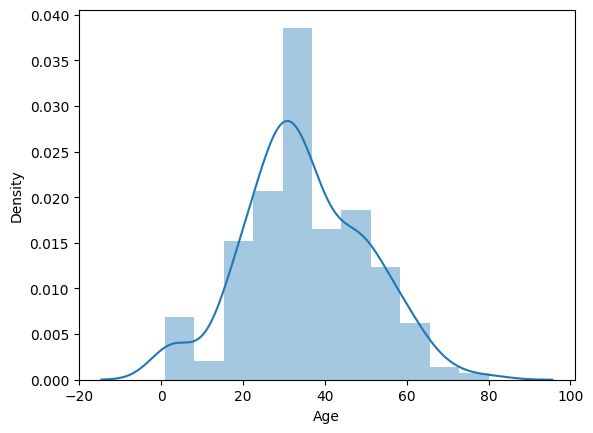

In [51]:
sns.distplot(t['Age']);

In [26]:
t.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [27]:
len(t)

891

In [28]:
t['Age'].mean()

np.float64(29.69911764705882)

In [29]:
t['Age']= t['Age'].fillna(t['Age'].mean())
t.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [30]:
t.dropna(subset=["Cabin"], inplace=True)

In [31]:
t.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [32]:
t.dropna(subset=["Embarked"], inplace=True)

In [33]:
t

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [34]:
t=t.drop("PassengerId", axis=1)

In [35]:
t=t.drop("Name", axis=1)

In [36]:
t.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
6,0,1,male,54.0,0,0,17463,51.8625,E46,S
10,1,3,female,4.0,1,1,PP 9549,16.7000,G6,S
11,1,1,female,58.0,0,0,113783,26.5500,C103,S


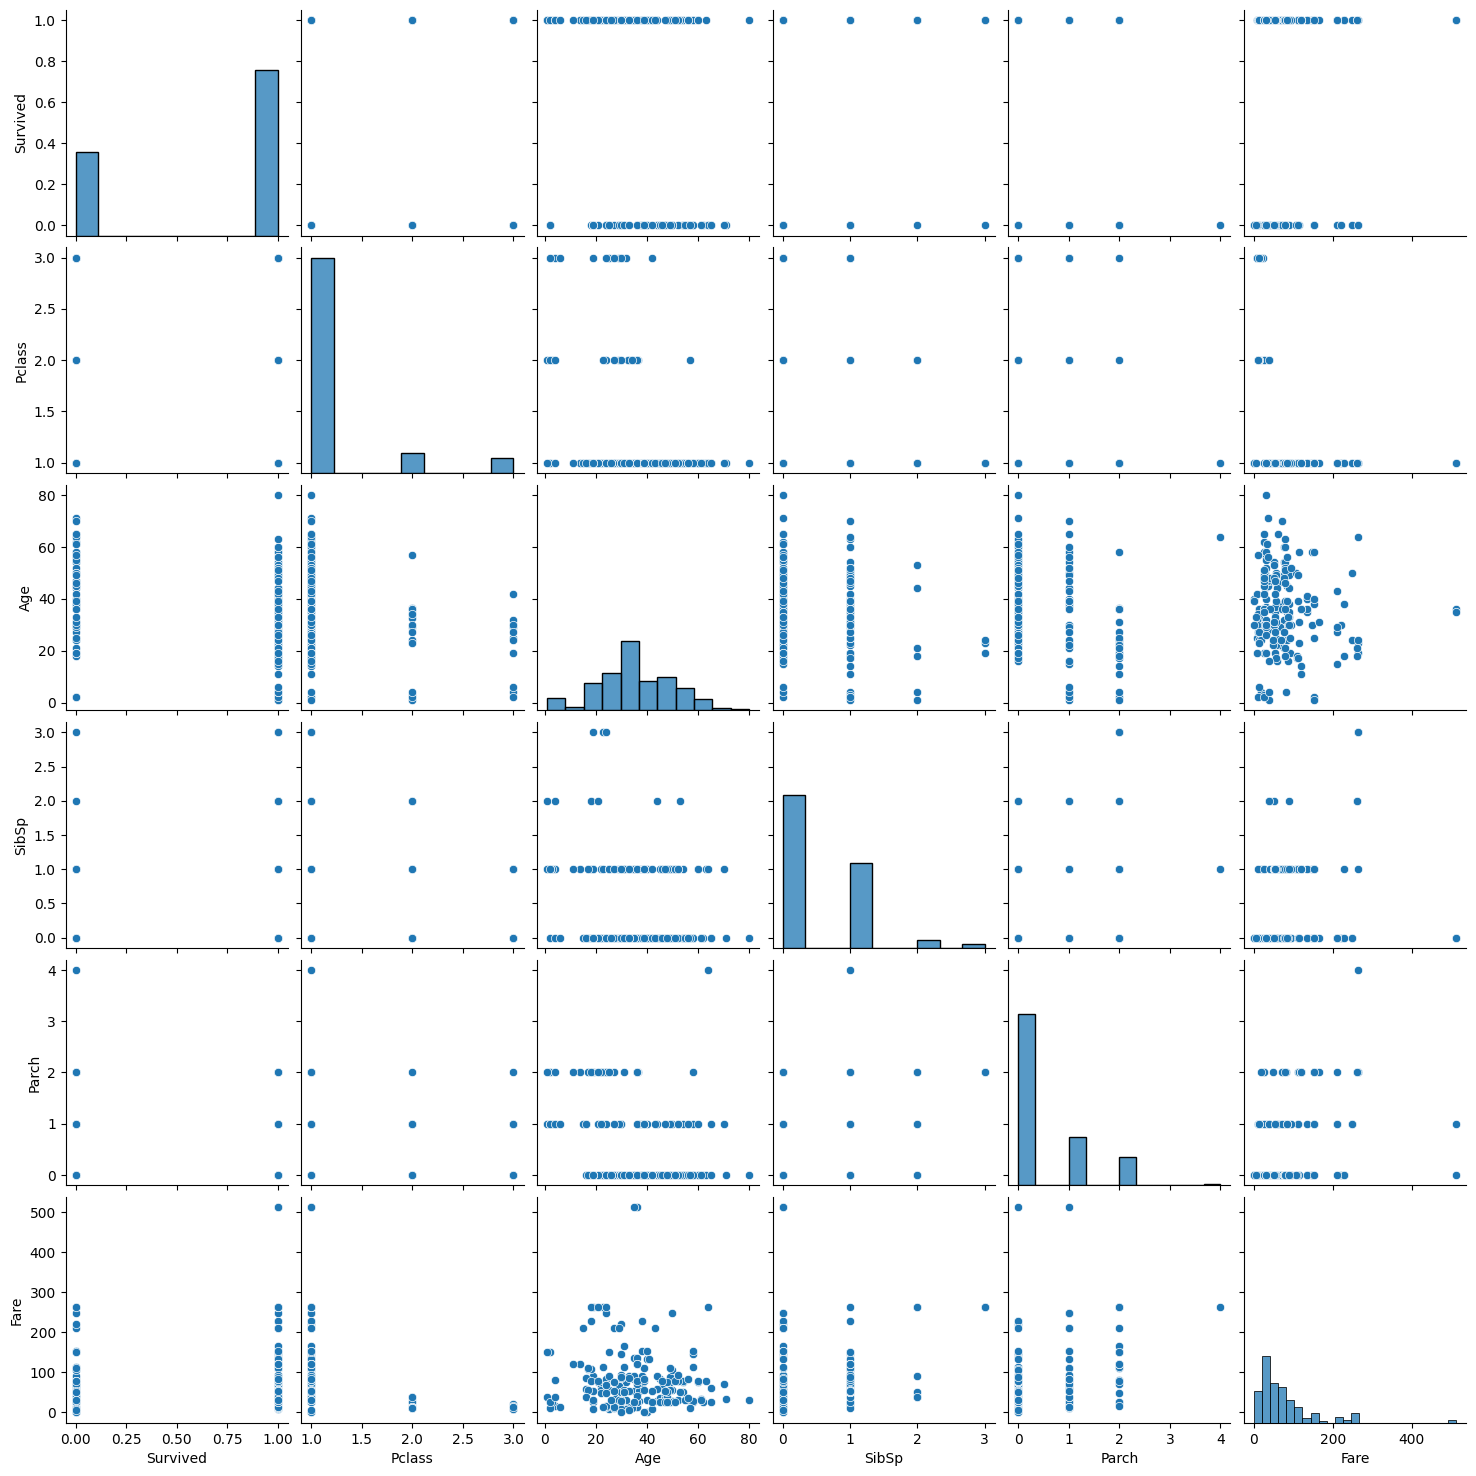

In [37]:
sns.pairplot(t)

In [38]:
Sex=pd.get_dummies(t["Sex"], drop_first=True)
Embarked=pd.get_dummies(t["Embarked"], drop_first=True)
t = pd.concat([t, Sex, Embarked], axis=1)

In [39]:
t.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Q,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,False,False,False
3,1,1,female,35.0,1,0,113803,53.1000,C123,S,False,False,True
6,0,1,male,54.0,0,0,17463,51.8625,E46,S,True,False,True
10,1,3,female,4.0,1,1,PP 9549,16.7000,G6,S,False,False,True
11,1,1,female,58.0,0,0,113783,26.5500,C103,S,False,False,True


In [40]:
t.drop(["Sex", "Embarked", "Ticket", "Cabin"], axis=1, inplace=True)

In [41]:
t

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
1,1,1,38.0,1,0,71.2833,False,False,False
3,1,1,35.0,1,0,53.1000,False,False,True
6,0,1,54.0,0,0,51.8625,True,False,True
10,1,3,4.0,1,1,16.7000,False,False,True
11,1,1,58.0,0,0,26.5500,False,False,True
...,...,...,...,...,...,...,...,...,...
871,1,1,47.0,1,1,52.5542,False,False,True
872,0,1,33.0,0,0,5.0000,True,False,True
879,1,1,56.0,0,1,83.1583,False,False,False
887,1,1,19.0,0,0,30.0000,False,False,True


In [42]:
from sklearn.model_selection import train_test_split
lr=LogisticRegression()

x=t.drop("Survived", axis=1)
y=t["Survived"]

x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.33)

lr.fit(x_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [43]:
y_pred=lr.predict(x_test)

In [44]:
lr.score(x_test, y_test)

0.5970149253731343

In [46]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.27      0.20      0.23        20
           1       0.69      0.77      0.73        47

    accuracy                           0.60        67
   macro avg       0.48      0.48      0.48        67
weighted avg       0.57      0.60      0.58        67



In [47]:
print(confusion_matrix(y_test, y_pred))

[[ 4 16]
 [11 36]]


<Axes: >

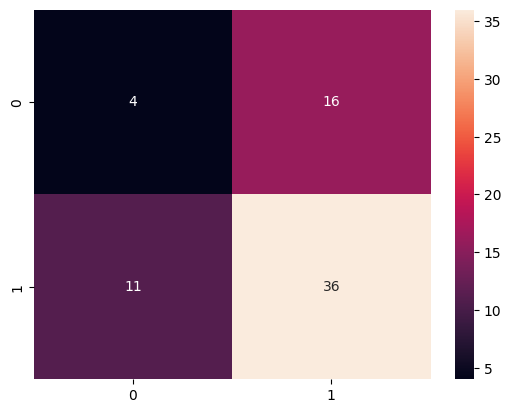

In [49]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)